In [1]:
import astropy.io
from astropy.io import fits
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.optimize as opt
from scipy.optimize import curve_fit
from itertools import islice


In [2]:
target1 = pd.read_csv('J020357.29+003310.6.csv')
#abflux = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * target1.Mag)+22.4328)
opflux = 10**(23-(target1.Mag +48.6)/2.5)
opflux_err = 10**(23-(target1.Mag + target1.Magerr +48.6)/2.5) - 10**(23-(target1.Mag +48.6)/2.5)
#opflux_err = (3631 * 3.6 * 10**(-10) * np.sinh(-0.92103 * (target1.Mag + target1.Magerr)+22.4328)) - (3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * target1.Mag)+22.4328))                

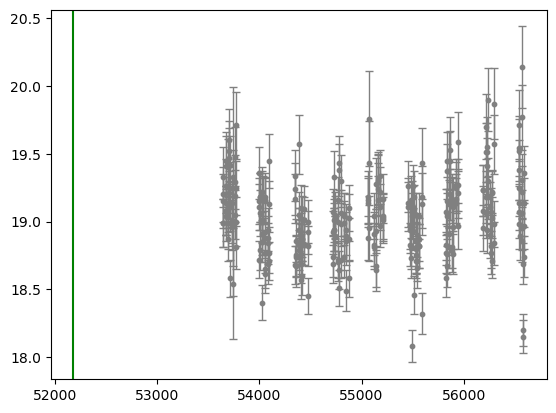

In [3]:
plt.scatter(target1.MJD,target1.Mag, s = 10, color = 'gray')
plt.errorbar(target1.MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray')
plt.axvline(x= 52179	, color ='g')	
#plt.axvline(x= , color ='g')	

In [4]:
sorted_MJD =sorted(target1.MJD)
len(sorted_MJD)

293

In [5]:
diff = []
for i in range(0,len(sorted_MJD)-1):
    diff.append(sorted_MJD[i+1] -sorted_MJD[i])
diff

[0.004119999997783452,
 0.00923999999940861,
 0.009270000002288725,
 0.009229999996023253,
 22.921159999998054,
 0.0038200000053620897,
 0.003819999998086132,
 0.0038300000014714897,
 5.952629999999772,
 0.005989999997837003,
 0.005929999999352731,
 0.005949999998847488,
 18.98058999999921,
 0.006410000001778826,
 0.0063999999983934686,
 0.006420000005164184,
 6.8454899999997,
 0.0064399999973829836,
 0.006480000003648456,
 0.006459999996877741,
 7.043729999997595,
 0.007519999999203719,
 0.007499999999708962,
 0.007480000000214204,
 22.959820000003674,
 0.0070500000001629815,
 0.006880000000819564,
 0.0072099999961210415,
 7.925890000005893,
 0.017039999998814892,
 0.008509999999660067,
 21.957149999994726,
 0.008090000002994202,
 0.008070000003499445,
 0.008099999999103602,
 10.002119999997376,
 0.0,
 0.005340000003343448,
 0.00533999999606749,
 223.2022500000021,
 0.008020000001124572,
 0.008089999995718244,
 0.008070000003499445,
 8.028169999997772,
 0.008770000000367872,
 0.008770

In [6]:
sum = 0
seppt = []
for j in range (0,len(diff)):
    if diff[j] >100:
        sum += 1
        seppt.append(j)
print(sum)
seppt

8


[39, 72, 108, 144, 172, 207, 241, 269]

In [7]:
slice_length = []
slice_length.append(seppt[0]+1)

for i in range(0,len(seppt)-1):
    slice_length.append(seppt[i+1]-seppt[i])
slice_length.append(len(sorted_MJD)-seppt[-1])
slice_length

[40, 33, 36, 36, 28, 35, 34, 28, 24]

In [8]:
Input = iter(sorted_MJD)
grouped_MJD =  [list(islice(Input, elem)) for elem in slice_length] 

In [9]:
data = target1.sort_values('MJD')
target1.sort_values('MJD')

,InputID,ID,Mag,Magerr,RA,Decl,MJD,Blend
20,J020357.29+003310.6,1101012011223,18.99,0.18,30.98852,0.55290,53648.34030,0
204,J020357.29+003310.6,1101012011223,19.20,0.20,30.98856,0.55296,53648.34442,0
205,J020357.29+003310.6,1101012011223,18.99,0.18,30.98875,0.55321,53648.35366,0
206,J020357.29+003310.6,1101012011223,19.15,0.20,30.98832,0.55267,53648.36293,0
207,J020357.29+003310.6,1101012011223,19.33,0.22,30.98865,0.55283,53648.37216,0
...,...,...,...,...,...,...,...,...
288,J020357.29+003310.6,1101012011223,18.15,0.12,30.98848,0.55209,56577.43247,0
289,J020357.29+003310.6,1101012011223,19.36,0.20,30.98854,0.55323,56591.28248,0
290,J020357.29+003310.6,1101012011223,19.14,0.18,30.98838,0.55338,56591.29009,0
291,J020357.29+003310.6,1101012011223,18.97,0.17,30.98842,0.55338,56591.29775,0


In [10]:
df_1 = data.iloc[:seppt[0],:]
df_1.to_csv('Group1.csv', index=False)
#print(df_1)
grouped_MJD[0][-1]

53773.13282

In [11]:
df_2 = data.iloc[seppt[0]+1:seppt[1],:]
#print(df_2)
df_2.to_csv('Group2.csv', index=False)
grouped_MJD[1][-1]

54090.21252

In [12]:
df_3 = data.iloc[seppt[1]+1:seppt[2],:]
#print(df_3)
df_3.to_csv('Group3.csv', index=False)
grouped_MJD[2][-1]

54477.13366

In [13]:
df_4 = data.iloc[seppt[2]+1:seppt[3],:]
#print(df_4)
df_4.to_csv('Group4.csv', index=False)
grouped_MJD[3][-1]

54881.12622

In [14]:
df_5 = data.iloc[seppt[3]+1:seppt[4],:]
#print(df_5)
df_5.to_csv('Group5.csv', index=False)
grouped_MJD[4][-1]

55208.11932

In [15]:
df_6 = data.iloc[seppt[4]+1:seppt[5],:]
#print(df_6)
df_6.to_csv('Group6.csv', index=False)
grouped_MJD[5][-1]

55589.12723

In [16]:
df_7 = data.iloc[seppt[5]+1:seppt[6],:]
#print(df_7)
df_7.to_csv('Group7.csv', index=False)
grouped_MJD[6][-1]

55946.11862

In [17]:
df_8 = data.iloc[seppt[6]+1:seppt[7],:]
#print(df_8)
df_8.to_csv('Group8.csv', index=False)
grouped_MJD[7][-1]

56299.10627

In [19]:
df_9 = data.iloc[seppt[7]+1:,:]
#print(df_9)
df_9.to_csv('Group9.csv', index=False)
grouped_MJD[8][-1]

56591.3054

In [ ]:
df_10 = data.iloc[seppt[8]+1:seppt[9],:]
#print(df_10)
df_10.to_csv('Group10.csv', index=False)
grouped_MJD[9][-1]

In [ ]:
df_11 = data.iloc[seppt[9]+1:seppt[10],:]
#print(df_11)
df_11.to_csv('Group11.csv', index=False)
grouped_MJD[10][-1]

In [ ]:
df_12 = data.iloc[seppt[10]+1:,:]
#print(df_12)
df_12.to_csv('Group12.csv', index=False)
grouped_MJD[11][-1]

In [20]:
med = []
centerMJD = []
medMJD = []
medopflux = []

g1 = pd.read_csv('group1.csv')
med1 = np.median(g1.Mag)
centerMJD1 = np.mean(g1.MJD)
medMJD1 = np.median(g1.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g1.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)


g2 = pd.read_csv('group2.csv')
med1 = np.median(g2.Mag)
centerMJD1 = np.mean(g2.MJD)
medMJD1 = np.median(g2.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g2.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g3 = pd.read_csv('group3.csv')
med1 = np.median(g3.Mag)
centerMJD1 = np.mean(g3.MJD)
medMJD1 = np.median(g3.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g3.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g4 = pd.read_csv('group4.csv')
med1 = np.median(g4.Mag)
centerMJD1 = np.mean(g4.MJD)
medMJD1 = np.median(g4.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g4.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g5 = pd.read_csv('group5.csv')
med1 = np.median(g5.Mag)
centerMJD1 = np.mean(g5.MJD)
medMJD1 = np.median(g5.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g5.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g6 = pd.read_csv('group6.csv')
med1 = np.median(g6.Mag)
centerMJD1 = np.mean(g6.MJD)
medMJD1 = np.median(g6.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g6.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g7 = pd.read_csv('group7.csv')
med1 = np.median(g7.Mag)
centerMJD1 = np.mean(g7.MJD)
medMJD1 = np.median(g7.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g7.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g8 = pd.read_csv('group8.csv')
med1 = np.median(g8.Mag)
centerMJD1 = np.mean(g8.MJD)
medMJD1 = np.median(g8.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g8.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g9 = pd.read_csv('group9.csv')
med1 = np.median(g9.Mag)
centerMJD1 = np.mean(g9.MJD)
medMJD1 = np.median(g9.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g9.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)



In [ ]:
g10= pd.read_csv('group10.csv')
med1 = np.median(g10.Mag)
centerMJD1 = np.mean(g10.MJD)
medMJD1 = np.median(g10.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g10.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g11= pd.read_csv('group11.csv')
med1 = np.median(g11.Mag)
centerMJD1 = np.mean(g11.MJD)
medMJD1 = np.median(g11.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g11.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g12= pd.read_csv('group12.csv')
med1 = np.median(g12.Mag)
centerMJD1 = np.mean(g12.MJD)
medMJD1 = np.median(g12.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g12.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)


In [21]:
med

[19.14, 18.93, 18.85, 18.94, 19.11, 18.915, 19.14, 19.18, 19.14]

In [22]:
centerMJD

[53707.75101153847,
 54040.289803437496,
 54401.281046000004,
 54785.72810428571,
 55135.41978074074,
 55518.06788941176,
 55872.30548181818,
 56241.437312592585,
 56563.43397391304]

In [23]:
medMJD


[53703.13352,
 54032.346145,
 54404.27323,
 54778.25505,
 55143.32945,
 55514.26995,
 55861.26081,
 56238.24485,
 56565.4705]

In [24]:
medopflux


[8.016780633876723e-05,
 9.727884833219724e-05,
 0.00010471285480508985,
 9.638290236239665e-05,
 8.241381150129963e-05,
 9.863736118884821e-05,
 8.016780633876723e-05,
 7.72680585095699e-05,
 8.016780633876723e-05]

In [25]:
st = 53648
#start of observations

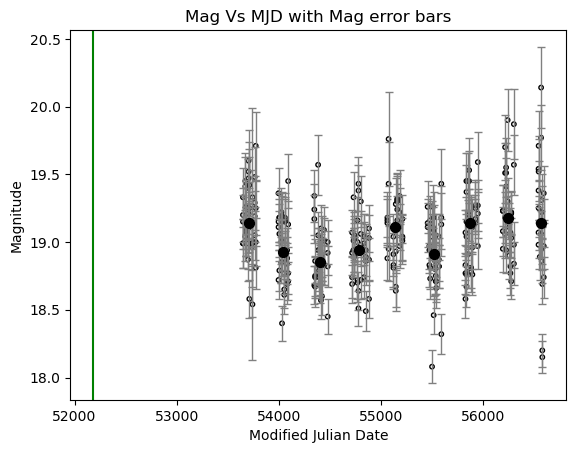

In [26]:
plt.scatter(target1.MJD,target1.Mag , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(centerMJD,med, s =50, color = 'k', zorder =3 )
plt.errorbar(target1.MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Magnitude')
plt.title('Mag Vs MJD with Mag error bars')

plt.axvline(x=52179	  , color ='g')	
#plt.axvline(x=  , color ='g')	

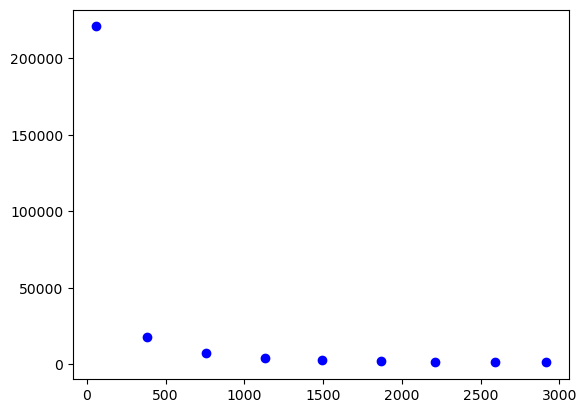

In [27]:
def f(x, a, b, c):
    return a * (x ** b) + c
x = np.array([item - st for item in medMJD])
y = f(x,4.05245427e+07,-1.3, 1.81095672e+01)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


In [28]:
popt3, pcov3 = curve_fit(f, x, med, maxfev =5000)


In [29]:
popt3

array([7.93888269e-11, 2.71940929e+00, 1.89738893e+01])

In [30]:
pcov3

array([[ 5.27372093e-18, -8.36353481e-09, -1.07098899e-10],
       [-8.36353481e-09,  1.32684821e+01,  1.67420208e-01],
       [-1.07098899e-10,  1.67420208e-01,  4.93133880e-03]])

In [31]:
 np.sqrt(np.diag(pcov3))

array([2.29645834e-09, 3.64259276e+00, 7.02234918e-02])

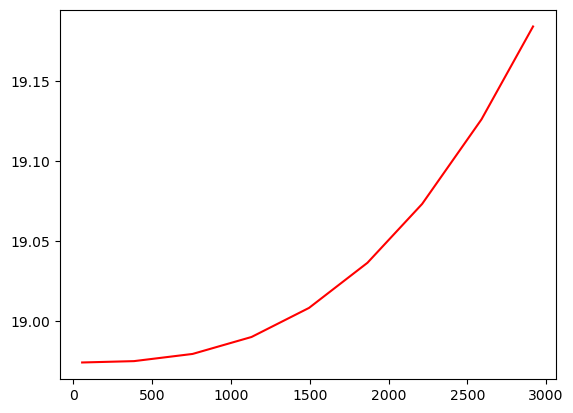

In [32]:
plt.plot(x, f(x,*popt3), 'r-')

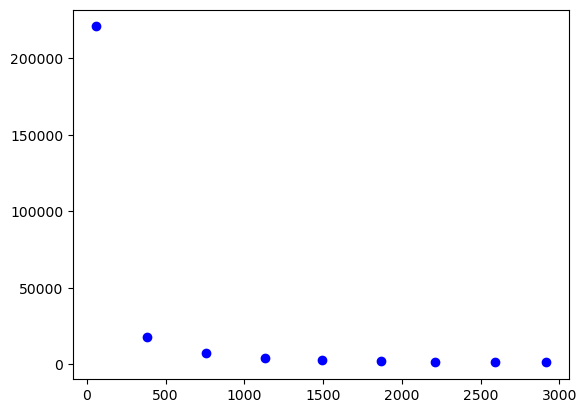

In [33]:
def g(x, a, b):
    return a * (x ** b) + 18
x = np.array([item - st	 for item in medMJD])
y = g(x,4.05245427e+07,-1.3)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


In [34]:
popt4, pcov4 = curve_fit(f, target1.MJD - st	, target1.Mag )

In [35]:
popt4

array([-1.91707101e+02,  5.40070477e-05,  2.10813705e+02])

In [36]:
pcov4

array([[ 2.00269898e+12,  5.64045480e+05, -2.00269902e+12],
       [ 5.64045480e+05,  1.58859276e-01, -5.64045490e+05],
       [-2.00269902e+12, -5.64045490e+05,  2.00269906e+12]])

In [37]:
 np.sqrt(np.diag(pcov4))

array([1.41516747e+06, 3.98571544e-01, 1.41516750e+06])

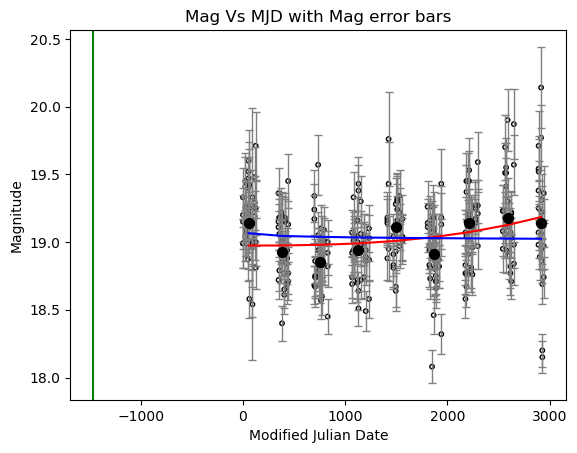

In [39]:
x = np.array([item - st for item in medMJD])
MJD = np.array([item - st for item in target1.MJD])
plt.scatter(MJD,target1.Mag , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(x,med, s =50, color = 'k', zorder =4 )
plt.errorbar(MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Magnitude')
plt.title('Mag Vs MJD with Mag error bars')

plt.axvline(x=  52179	-st, color ='g')	
#plt.axvline(x= -st, color ='g')
plt.plot(x, f(x,*popt3), 'r-', zorder=3)
plt.plot(x, f(x,*popt4), 'b-', zorder=3)
#plt.plot(x, g(x, 0.66649567, -0.32796038), 'y-', zorder=3)
#plt.plot(x, g(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'g', zorder=3)



Text(0.5, 1.0, 'Flux Density Vs MJD with Flux error bars')

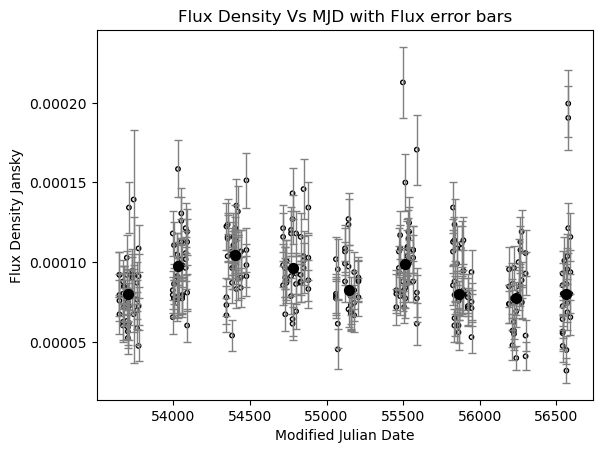

In [40]:
plt.scatter(target1.MJD ,opflux , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
#plt.scatter(target1.MJD ,abflux , s = 10, edgecolors = 'r', facecolors = 'none', zorder = 1)
plt.scatter(medMJD ,medopflux , s =50, color = 'k', zorder =3 )
plt.errorbar(target1.MJD,opflux, yerr = np.absolute(opflux_err), fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Flux Density Jansky')
plt.title('Flux Density Vs MJD with Flux error bars')
#plt.ylim(0, 0.0004)

#plt.axvline(x=  , color ='g')	
#plt.axvline(x= , color ='g')

In [41]:
popt2, pcov2 = curve_fit(f, x, medopflux, maxfev =5000)

In [42]:
popt2

array([-2.57363269e+05, -5.99204949e+00,  8.96286787e-05])

In [43]:
pcov2

array([[6.08217900e+21, 5.96214800e+15, 1.23306185e+05],
       [5.96214800e+15, 5.84448580e+09, 1.20873191e-01],
       [1.23306185e+05, 1.20873191e-01, 1.90975976e-11]])

In [44]:
 np.sqrt(np.diag(pcov2))

array([7.79883261e+10, 7.64492367e+04, 4.37007982e-06])

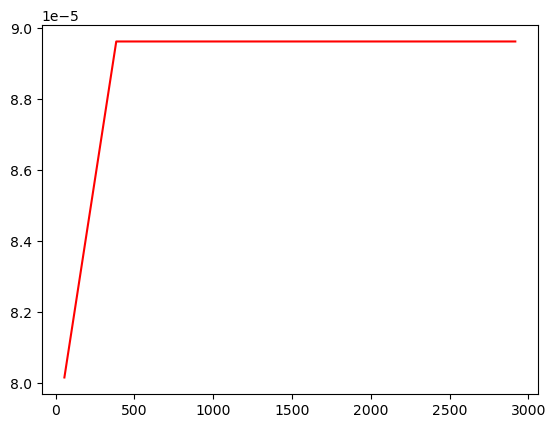

In [45]:
plt.plot(x, f(x,*popt2), 'r-')

In [46]:
popt1, pcov1 = curve_fit(f, target1.MJD - st, opflux, maxfev =5000)

In [47]:
popt1

array([ 1.77064650e-02,  6.96030851e-05, -1.76233861e-02])

In [48]:
pcov1

array([[ 9.14959651e+03, -3.67106085e+01, -9.14959681e+03],
       [-3.67106085e+01,  1.47292703e-01,  3.67106098e+01],
       [-9.14959681e+03,  3.67106098e+01,  9.14959712e+03]])

In [49]:
 np.sqrt(np.diag(pcov1))

array([95.65352323,  0.38378732, 95.65352646])

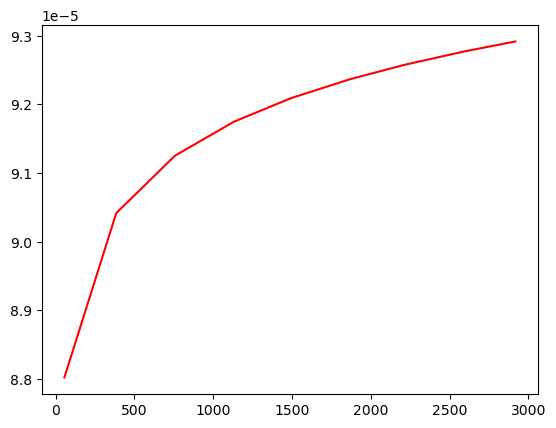

In [54]:
plt.plot(x, f(x,*popt1), 'r-')

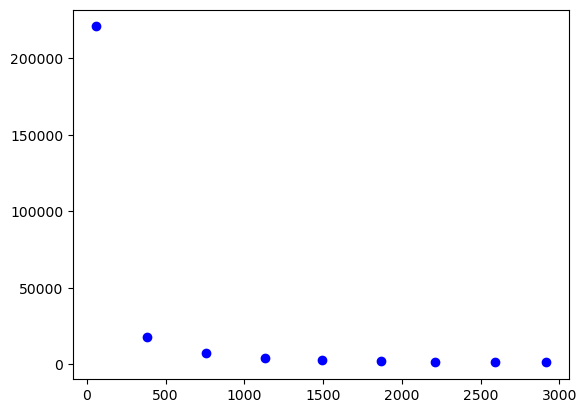

In [55]:
def h(x, a, b):
    return a * (x ** b) + 0.00015
x = np.array([item - st	 for item in medMJD])
y = h(x,4.05245427e+07,-1.3)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


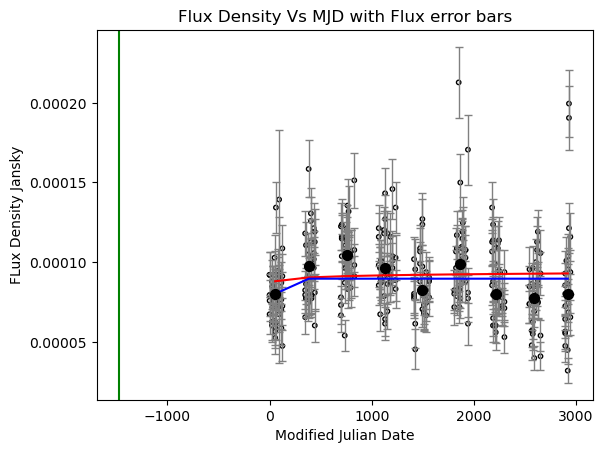

In [53]:
x = np.array([item - st for item in medMJD])
MJD = np.array([item - st for item in target1.MJD])
plt.scatter(MJD,opflux , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(x,medopflux, s =50, color = 'k', zorder =4 )
plt.errorbar(MJD,opflux, yerr =np.absolute(opflux_err), fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('FLux Density Jansky')
plt.title('Flux Density Vs MJD with Flux error bars')
#plt.ylim(0, 0.0004)

plt.axvline(x= 52179	-st, color ='g')	
#plt.axvline(x= -st, color ='g')
plt.plot(x, f(x, *popt1), 'r-', zorder=3)
plt.plot(x, f(x,*popt2), 'b-', zorder=3)
#plt.plot(x, h(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'b-', zorder=3)
#plt.plot(x, h(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'g-', zorder=3)


In [52]:
def mase(actual : np.ndarray, predicted : np.ndarray):

    forecast_error = np.mean(np.abs(actual - predicted))
    naive_forecast = np.mean(np.abs(np.diff(actual)))
    mase = forecast_error / naive_forecast

    return mase

In [ ]:
actual = medopflux
predicted1 = func(x,)
predicted2 = func(x,)



In [ ]:
mase(actual,predicted1)

In [ ]:
mase(actual,predicted2)

In [ ]:
resid = opflux - func(x,)
chi2 = sum((resid / func(x,))**2)
chi2_red = chi2 / dof
